# Machine Learning 2020-2021 - UMONS 
# Exploratory Data Analysis of the Pokemon dataset


In [1]:
import pandas as pd   #importing all the important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [14]:
df =  pd.read_csv('data/Pokemon.csv')  #read the csv file and save it into a variable
df.head(n=10)                    #print the first 10 rows of the table


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Your turn! Make some exploratory data analysis and cleaning of the Pokemon dataset 

- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

1) Print the general information of the Pokemon dataset. 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


2) Get the shape of the dataframe. 

In [5]:
df.shape

(800, 13)

3) Drop the "#' column and set the dataframe index to the 'Name' column. 

In [16]:
df.drop(['#'], axis = 1, inplace = True) #drop the '#' column.
df.set_index('Name', inplace=True) #Set 'Name' as index.
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


4) Check if there are any missing values in the dataframe, and count them per column. For the categorical variables, replace the missing values by 'None'. For the remaining variables, drop the complete row containing the missing value. Check that the dataframe does not contain missing values anymore. 

In [17]:
#Count missing values
df.isna().sum()

Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [19]:
#replace the missing values by ‘None’
df['Type 2'].fillna('None', inplace=True)
#For the remaining variables, drop the complete row containing the missing value
df.dropna(axis=0, inplace=True)
#Check that the dataframe does not contain missing values anymore.
assert ~df.isna().values().any()
df.isna().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

5) Change the data types of 'Type 1' and 'Type 2' and 'Generation' to categorical data.

In [21]:
df = df.astype({'Type 1': 'category', 'Type 2': 'category', 'Generation': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Type 1      800 non-null    category
 1   Type 2      800 non-null    category
 2   Total       800 non-null    int64   
 3   HP          800 non-null    int64   
 4   Attack      800 non-null    int64   
 5   Defense     800 non-null    int64   
 6   Sp. Atk     800 non-null    int64   
 7   Sp. Def     800 non-null    int64   
 8   Speed       800 non-null    int64   
 9   Generation  800 non-null    category
 10  Legendary   800 non-null    bool    
dtypes: bool(1), category(3), int64(7)
memory usage: 54.7+ KB


6) Get general statistics (mean, standard deviation,...) for the numerical attributes of the dataset. 

In [22]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


7) For the categorical variables, count the number of values per category, as well as the count of co-occurences.

In [28]:
df['Type 1'].value_counts()
df['Type 2'].value_counts()
df['Generation'].value_counts()
df[['Type 1', 'Type 2', 'Generation']].value_counts()

Type 1  Type 2  Generation
Water   None    1             19
Normal  None    3             14
                1             13
                4             12
Water   None    3             12
                              ..
Fire    Rock    2              1
        Steel   4              1
Normal  Ground  6              1
Fire    Water   6              1
Water   Steel   4              1
Length: 293, dtype: int64

8) Get all the attributes of 'Bulbasaur'

In [31]:
df.loc["Bulbasaur"]

Type 1         Grass
Type 2        Poison
Total            318
HP                45
Attack            49
Defense           49
Sp. Atk           65
Sp. Def           65
Speed             45
Generation         1
Legendary      False
Name: Bulbasaur, dtype: object

9) Sort the dataframe by increasing values of 'Attack' and decreasing values of 'Defense' (i.e. if two Pokemons have the same value for 'Attack', the one with higher 'Defense' should appear first). 

In [32]:
df.sort_values(by=["Attack", "Defense"], ascending=[True, False])

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Chansey,Normal,None,450,250,5,5,35,105,50,1,False
Happiny,Normal,None,220,100,5,5,15,65,30,4,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
Magikarp,Water,None,200,20,10,55,15,20,80,1,False
Blissey,Normal,None,540,255,10,10,75,135,55,2,False
...,...,...,...,...,...,...,...,...,...,...,...
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,True


10) Create a dataframe containing all Pokemons of type 1 'Psychic' having more than 100 in 'Attack', less than 40 in 'Defense' and more than 45 in Speed.

In [35]:
sub_df = df[(df['Type 1'] == 'Psychic') & (df['Attack'] > 100) & (df['Defense'] < 40) & (df['Speed'] > 45)]
sub_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,True


11) Create two new columns, 'AttackAll' and 'DefenseAll' which take the sum of Attack and Sp. Attack, and the sum of 'Defense' and 'Sp. Defense' respectively. 

In [36]:
df["AttackAll"] = df["Attack"]+df["Sp. Atk"]
df["DefenseAll"] = df["Defense"]+df["Sp. Def"]
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,AttackAll,DefenseAll
Name,,,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,114,114
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,142,143
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,182,183
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,222,243
Charmander,Fire,None,309,39,52,43,60,50,65,1,False,112,93


12) Write a generic function taking the ratio of two values 'a' and 'b'. Use this function to create a new column 'AtkOverDef' giving the ratio of 'AttackAll' over 'DefenseAll' for each Pokemon. 

In [37]:
def ratio(a,b):
    return a/b

df["AtkOverDef"] = ratio(df["AttackAll"], df["DefenseAll"])
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,AttackAll,DefenseAll,AtkOverDef
Name,,,,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,114,114,1.000000
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,142,143,0.993007
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,182,183,0.994536
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,222,243,0.913580
Charmander,Fire,None,309,39,52,43,60,50,65,1,False,112,93,1.204301


13) Change the column names to upper cases, and remove the '.' in the column names, as well as blanks. 

In [38]:
df.columns = df.columns.str.upper().str.replace('.', '').str.replace(' ', '') #change into upper case
df.head()

C:\Users\epcs mons\AppData\Local\Temp\ipykernel_3224\3854021541.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.upper().str.replace('.', '').str.replace(' ', '') #change into upper case


,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SPATK,SPDEF,SPEED,GENERATION,LEGENDARY,ATTACKALL,DEFENSEALL,ATKOVERDEF
Name,,,,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,114,114,1.000000
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,142,143,0.993007
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,182,183,0.994536
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,222,243,0.913580
Charmander,Fire,None,309,39,52,43,60,50,65,1,False,112,93,1.204301


14) Plot an histogram of the different 'TYP1' categories. The figure must be 8 inch wide and 4 inch high. 
Use the matplotlib.pyplot library and the countplot method from the seaborn librabry. The counts should appear in increasing order.

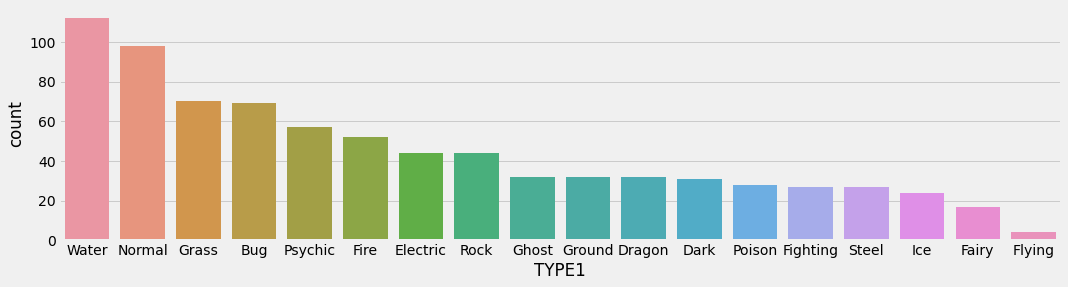

In [40]:
plt.figure(figsize=(16,4)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='TYPE1', data=df, order = df.TYPE1.value_counts().index)
#sns.countplot(x='TYP1', data=df)
plt.show()

15) Do the same as above, but for the 'TYP2' categories. 

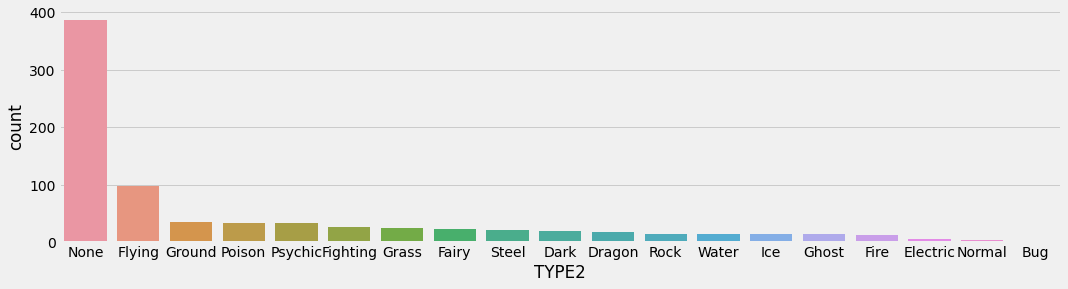

In [41]:
plt.figure(figsize=(16,4)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='TYPE2', data=df, order = df.TYPE2.value_counts().index)
#sns.countplot(x='TYP1', data=df)
plt.show()

16) Plot the densities of the variables 'Attack', 'Defenses' and 'Speed' onto three separates plots. Use the displot method of the library seaborn. 

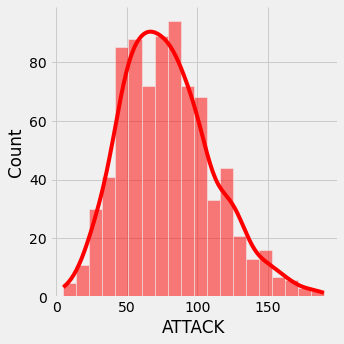

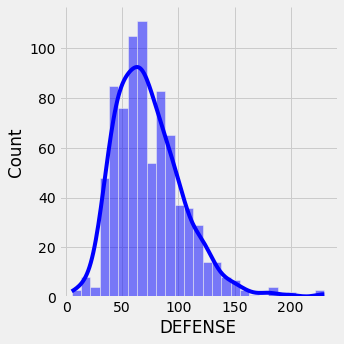

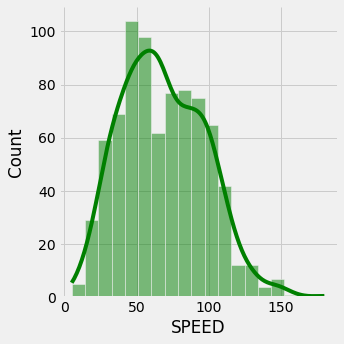

In [44]:
sns.displot(df['ATTACK'], color='red',kde=True)
sns.displot(df['DEFENSE'], color='blue', kde=True)
sns.displot(df['SPEED'], color='green', kde=True)

17) Plot the density of the variable 'ATTACK' for Legendary and non Legendary pokemons. The two densities should appear on different facets of the same plot. 

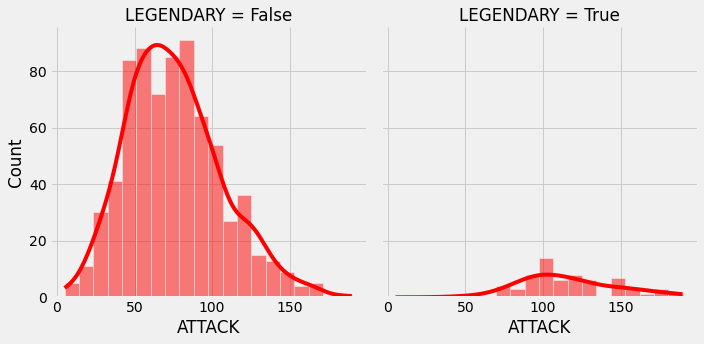

In [45]:
sns.displot(data=df, x='ATTACK', color='red', kde=True, col='LEGENDARY')

18a) Generate a scatter plot of the variable 'Defense' on the y-axis, and the variable 'Attack' on the x-axis. Also, plot a simple linear regression model between the two variables on the same plot. Use the method lmplot of the library seaborn. 

18b) Do the same, but with the variable 'Total' in the y-axis. 

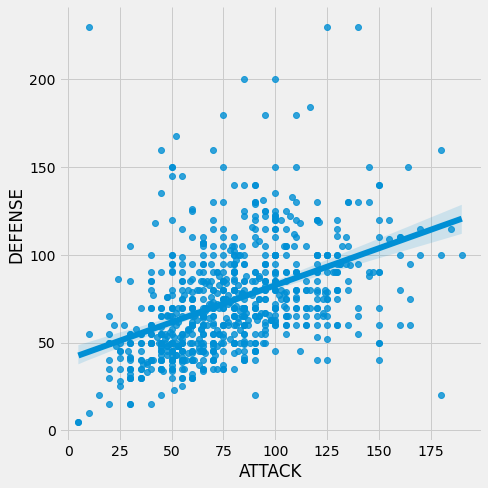

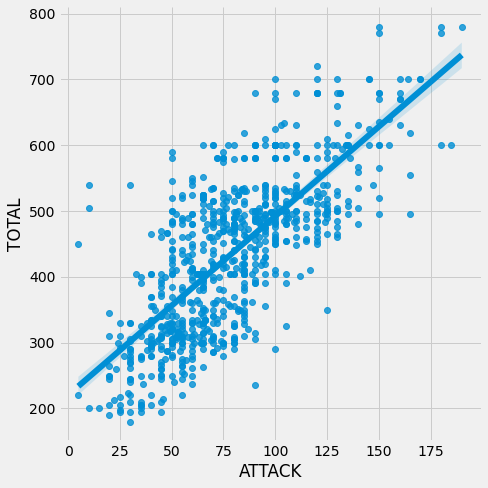

In [46]:
sns.lmplot(x='ATTACK', y='DEFENSE', data=df, height=7)
sns.lmplot(x='ATTACK', y='TOTAL', data=df, height=7)

19) Create an histogram of the variable 'GENERATION'. The counts should appear in increasing order. 

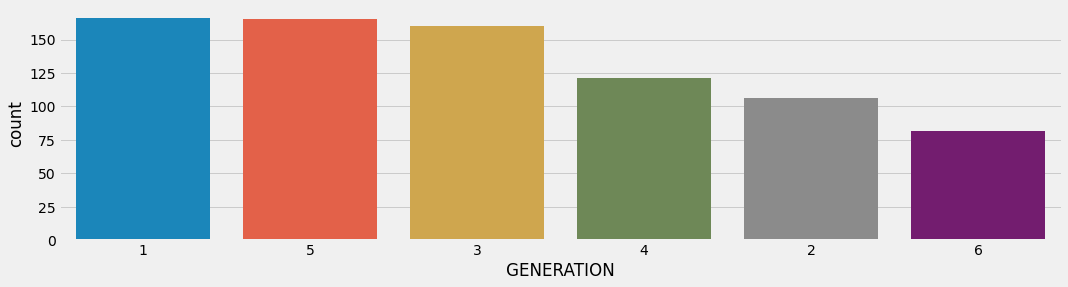

In [48]:
plt.figure(figsize=(16,4))
sns.countplot(x='GENERATION', data=df, order = df.GENERATION.value_counts().index)
plt.show()

20) Generate a boxplot of the variable 'TOTAL'. Use the method boxplot from the library seaborn. 

<AxesSubplot:ylabel='TOTAL'>

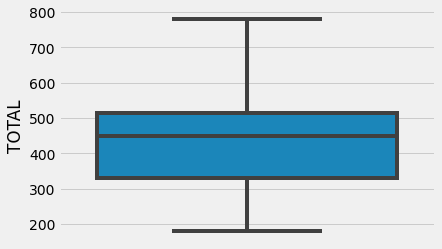

In [50]:
sns.boxplot(y='TOTAL', data=df)

21) Generate one boxplot of the variable 'TOTAL' per category of the variable 'GENERATION'. All boxplots must appear on the same plot. 

<AxesSubplot:xlabel='GENERATION', ylabel='TOTAL'>

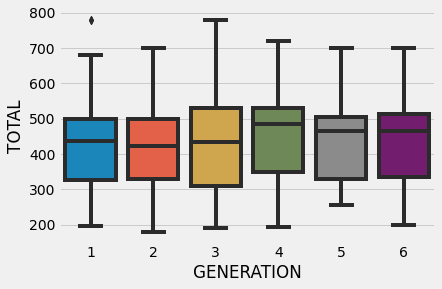

In [51]:
sns.boxplot(x='GENERATION', y='TOTAL', data=df)